## General Steps in Data Science

In [1]:
#0 Define the problem clear statement(This would be mainly from business)
#1 Extract data/Load Data (Learning/Training enviromnents have )
#2 Perform exploratatory data analysis(EDA , this includes find missing values , impute missing data , transform data,
#  feature extraction , feature remaoval, encoding categorical variables)
#3 Create model  Train the model
#4 Predict outcomes on test data , using the model created in #3
#5 Evaluate the predictions using metrics
#6 Repeat #1 to #5 until you are satisfied with the results of predictions

## STEP 0 - Defining the Problem statement

In [2]:
# Predict the total ride duration of taxi/limo(could be any ride hailing service) trips in new work city.

In [3]:
# Accepatble solution -  The solution is acceptable  
# if the error (root mean squared error RMSE) < 0.4(I magde it up!! :) 

## STEP 1 - Extract Data/Load Data

In [4]:
# This step might be a little more involved in real projects. 
# Enterprises have data available in multiple sources - csv , sql server , oracle server 
#  , SAP , other CMS  , nosql etc.
# We are working on a demo here , so its just a csv file

In [5]:
# Importing the necessary libraries
import pandas as pd  #Sklearn library to playaround with datasets.
import seaborn as sns #Seaborn library to plot graphs and charts
import numpy as np #Numpy library for performing mathematical operations like sqrt , log , abs etc.
import matplotlib.pyplot as plt #Library to plot graphs
from sklearn.linear_model import LinearRegression #Library to perform linear regression
from sklearn.model_selection import train_test_split #Splits data into test and train ,on the ratio we specify
from sklearn.metrics import mean_squared_error # calculates mean squared error for linear regression models
from sklearn.preprocessing import StandardScaler #Standard scaling library
from sklearn.model_selection import KFold # KFold cross validation
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression library

In [6]:
# Load Data
trip_df = pd.read_csv('nyc_taxi_trip_duration.csv')

## STEP 2 - Perform Exploratatory Data Analysis

In [7]:
# Inital analysis/ data exploration. Check the first few rows of how the data looks like.
trip_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [8]:
# Datatypes and missing values of each variables
trip_df.info()
trip_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
# Shape of the data , number of rows and columns
trip_df.shape

(729322, 11)

In [10]:
# Since there is no missing values , there is no imputation for missing values involved here.

## Distribution of each feature(Univariate Analysis)

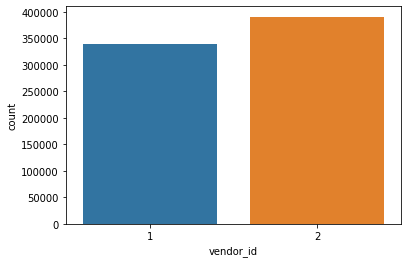

In [11]:
# lets start with vendor id
sns.countplot(trip_df['vendor_id'])

In [12]:
# The data seems pretty evenly distributed for each  vendor id. Nothing much to do here.

In [13]:
# We have the trip start and end date time available in features. This is Trip Duration after all , our target .
# Lets verify if dropoff time -  pick up time  = Trip Duration(in seconds)

In [14]:
calculated_trip_duration = (pd.to_datetime(trip_df['dropoff_datetime']) - pd.to_datetime(trip_df['pickup_datetime'])).dt.total_seconds()

In [15]:
trip_duration_difference = (calculated_trip_duration - trip_df['trip_duration']) > 1

In [16]:
trip_duration_difference.any()

False

In [17]:
# This looks  good , none of the values are true. Trip duration seems to be correctly derived.

In [18]:
# Pickup and dropoff times
# Lets try to extract day of week , month  and hour parameter , as they might help as useful features.
# It ussually takes longer on  weekdays , festiev months , duting evening hours etc.

In [19]:
dropoff_weekday = pd.to_datetime(trip_df['dropoff_datetime']).dt.weekday

In [20]:
dropoff_hours  = pd.to_datetime(trip_df['dropoff_datetime']).dt.hour

In [21]:
pickup_weekday = pd.to_datetime(trip_df['pickup_datetime']).dt.weekday

In [22]:
pickup_hours = pd.to_datetime(trip_df['pickup_datetime']).dt.hour

In [23]:
dropoff_month = pd.to_datetime(trip_df['dropoff_datetime']).dt.month

In [24]:
pickup_month = pd.to_datetime(trip_df['pickup_datetime']).dt.month

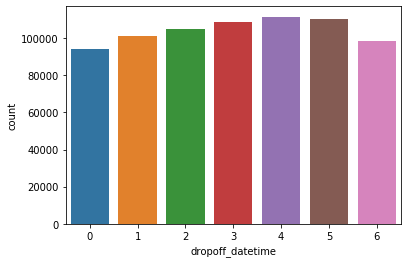

In [25]:
#plot distribution of dropoff weekday
sns.countplot(dropoff_weekday)
#The distribution looks pretty much normal. 
#Its slightly higher on  thursday\friday and gets lighter on weekend later

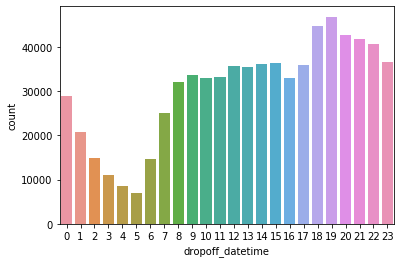

In [26]:
# plot distrinution of dropff hours
sns.countplot(dropoff_hours)
# the distbution shows that early mornings are lighter , after noon slightly busy and evenings are the busiest

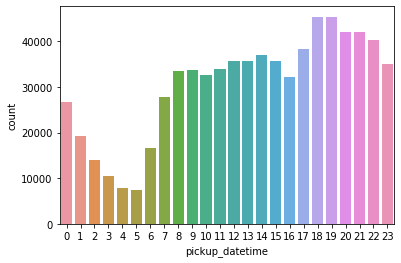

In [27]:
# plot distruibution of pickup hours 
sns.countplot(pickup_hours)
# the distbution shows that early mornings are lighter , after noon slightly busy and evenings are the busiest

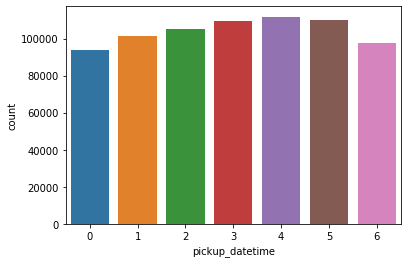

In [28]:
# plot distrbution of pickup weekdays
sns.countplot(pickup_weekday)
#The distribution looks pretty much normal. 
#Its slightly higher on  thursday\friday and gets lighter on weekend later

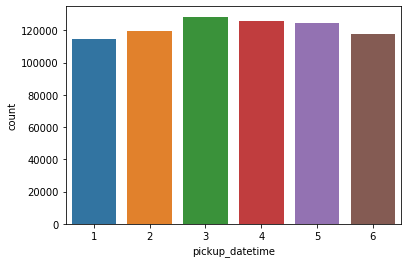

In [29]:
# plot distribution of pickup months
sns.countplot(pickup_month)

# The data is onl for six months ,  so only six bars displayed below. The distribution is pretty normal, with light
# increase during summer.But its not significantly different

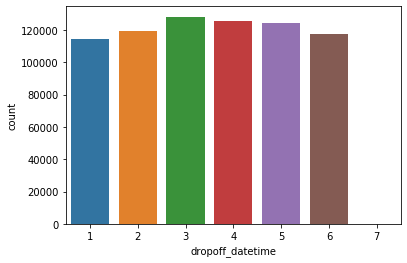

In [30]:
# plot distribution  of  dropoff months

sns.countplot(dropoff_month)
# The data is only for six months ,  so only six bars displayed below. The distribution is pretty normal too, 
# with light  increase during summer.But its not significantly different

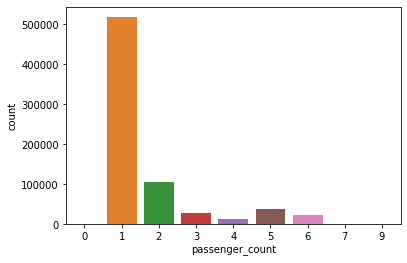

In [31]:
# plot distribution of passenger count
sns.countplot(trip_df['passenger_count'])

# looks like most of the rides has passenger count = 1 ,2 and surprisingly count pf panssengers = 5,6 
# are more than  count  = 3 and 4

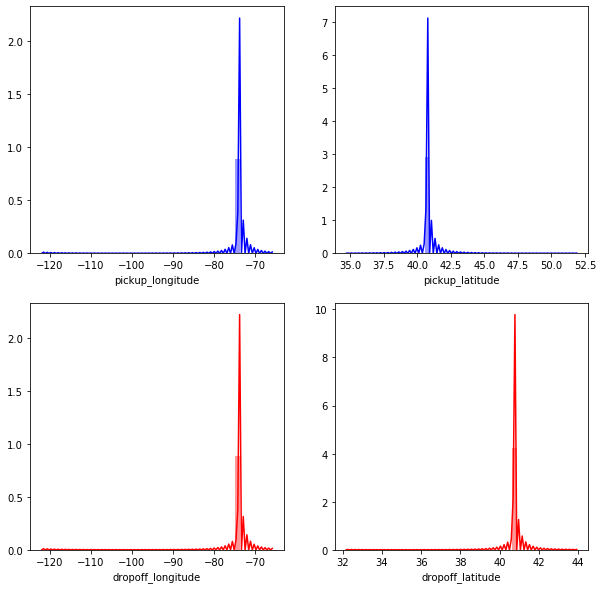

In [32]:
# plotting distribution of pickup longitude and pick latitude
f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(trip_df['pickup_longitude'] , color = 'b', ax = axes[0,0])
sns.distplot(trip_df['pickup_latitude'] , color = 'b', ax = axes[0,1])

sns.distplot(trip_df['dropoff_longitude'] , color = 'r', ax = axes[1,0])
sns.distplot(trip_df['dropoff_latitude'] , color = 'r', ax = axes[1,1])

In [33]:
# looking at the  pickup latitude and longitude , there are some outliers lets remove them. 
# We will experiment with removal/without removing
trip_df = trip_df[trip_df['pickup_latitude'] > 39]
trip_df = trip_df[trip_df['pickup_latitude'] < 43]

trip_df = trip_df[trip_df['pickup_longitude'] > -78]
trip_df = trip_df[trip_df['pickup_longitude'] < -73]

In [34]:
# looking at the  dropoff latitude and longitude , there are some outliers lets remove them. 
# We will experiment with removal/without removing
trip_df = trip_df[trip_df['dropoff_latitude'] > 39]
trip_df = trip_df[trip_df['dropoff_latitude'] < 43]

trip_df = trip_df[trip_df['dropoff_longitude'] > -78]
trip_df = trip_df[trip_df['dropoff_longitude'] < -73]

## Analysing each feature against the target(trip duration)

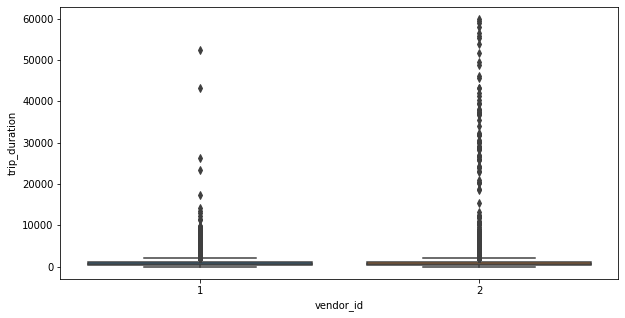

In [35]:
# plot vendorid vs  trip duration
plt.figure(figsize = (10,5))
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = trip_df[trip_df['trip_duration'] < 60000])
# there are more outliers of vendor 2 as compared to vendor 1

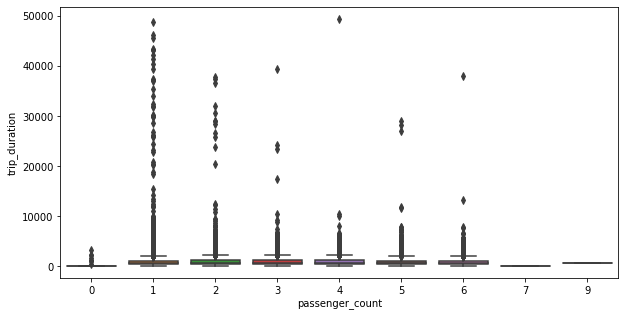

In [36]:
# trip duration vs passenger count
plt.figure(figsize = (10,5))
sns.boxplot(x = 'passenger_count' , y = 'trip_duration', data = trip_df[trip_df['trip_duration'] < 50000])

# there are outliers for each passenger count , as we see in the box plots. 
# The distribution is similar for all passenger counts.

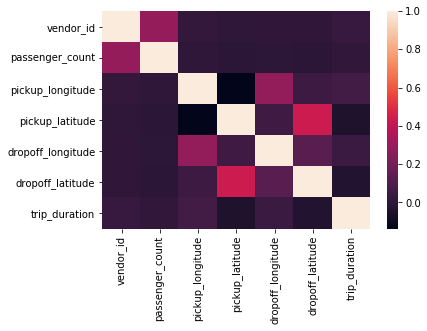

In [37]:
# Correlation between features and  target
sns.heatmap(trip_df.corr())
# pickup latitude . longitude and drop off latitude and longitude have highere correlation with trip duration
# as per the heatmap

## Step 4 - Create Model and train the model

In [38]:
trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [39]:
# id column will not help us in any way predicting the model. so lets drop it
trip_df.drop(['id'] , axis = 1, inplace = True)

In [40]:
# enocde the vendor id column , currently the values in it are ordinal. we need to convert it to nomimal 
vendor_dummies = pd.get_dummies(trip_df['vendor_id'] , drop_first = True)

In [41]:
# replace vendor id with the dummy values
trip_df['vendor_id'] = vendor_dummies

In [42]:
# in our data exploration section we already extracted few important data from datetime columns 
# lets add the identified columns to the dataframe
trip_df['dropoff_weekday'] = dropoff_weekday
trip_df['dropoff_hours'] = dropoff_hours
trip_df['dropoff_month'] = dropoff_month

trip_df['pickup_weekday'] = pickup_weekday
trip_df['pickup_hours'] = pickup_hours
trip_df['pickup_month'] = pickup_month

In [43]:
from haversine import haversine, Unit

In [44]:
#distance of each trip
distance = trip_df.apply(lambda x :  haversine((x['pickup_latitude'] , x['pickup_longitude']) ,
                     (x['dropoff_latitude'] , x['dropoff_longitude'])) , axis = 1)

In [45]:
trip_df['distance'] = distance

In [46]:
#encode the store and fwd flag. we need to experiment with it if its even useful
store_fwd_dummy = pd.get_dummies(trip_df['store_and_fwd_flag'], drop_first = True)

In [47]:
trip_df['store_fwd'] = store_fwd_dummy

In [48]:
#drop all the columns which are not required anymore.
trip_df.drop(['pickup_datetime' , 'dropoff_datetime', 'pickup_latitude', 'dropoff_latitude' , 'pickup_longitude',
             'dropoff_longitude', 'store_and_fwd_flag'] , axis = 1 , inplace = True)

In [49]:
# There are a few nans - 23 as of now. drop them as of now
trip_df = trip_df.dropna()

In [50]:
# Reset index
trip_df.reset_index()

,index,vendor_id,passenger_count,trip_duration,dropoff_weekday,dropoff_hours,dropoff_month,pickup_weekday,pickup_hours,pickup_month,distance,store_fwd
0,0,1,1,400,0,16,2,0,16,2,1.199074,0
1,1,0,2,1100,4,23,3,4,23,3,4.129117,0
2,2,1,2,1635,6,18,2,6,17,2,7.250763,0
3,3,1,6,1141,1,10,1,1,9,1,2.361101,0
4,4,0,1,848,2,6,2,2,6,2,4.328540,0
5,5,1,2,1455,6,18,2,6,18,2,3.119716,0
6,6,0,1,397,2,20,4,2,20,4,1.143981,0
7,7,1,1,1101,6,17,6,6,16,6,7.763600,0
8,8,1,2,1886,0,19,3,0,19,3,9.043659,0
9,9,0,1,1429,6,22,4,6,22,4,6.138319,0


In [51]:
# Split the dataset into test set and training set
features = trip_df.drop(['trip_duration'], axis = 1)
target = np.log(trip_df['trip_duration'])

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2)

In [52]:
# Lets first train model on a simple linear regression and evaluate the results
linear_reg = LinearRegression()

In [53]:
#Train  linear regression model
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#Evaluate linear regression
y_pred = linear_reg.predict(X_test)

In [55]:
print('RMSE for simple linear regression model - ', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE for simple linear regression model -  0.621975935169767


In [56]:
# Train test split has its own caveats  - one is once cannot be sure of if the data we are training on is evenly
# distributed or not. If not it might give us some biased predictions

In [57]:
# Now we will will use cross validation to train/test  different linear regression models available and measure its
# error rate RMSE. Lets perform K-FOLD crosss validation here

In [58]:
# Linear Regression using K-Fold cross validation
kfold = KFold(n_splits = 5) #Number of splits = 5
lin_reg = LinearRegression()

for train_index , test_index in kfold.split(features,target):    
    lin_reg.fit(features.iloc[train_index], target.iloc[train_index])
    y_pred = lin_reg.predict(features.iloc[test_index])
    print('RMSE : ', np.sqrt(mean_squared_error(target.iloc[test_index],y_pred)))
    

RMSE :  0.6172978839736468
RMSE :  0.6208519428658619
RMSE :  0.6242164602242876
RMSE :  0.625321335298607
RMSE :  0.6232730017098267


In [59]:
# Random forest using K-Fold
kfold = KFold(n_splits = 5) #Number of splits = 5
rf_reg = RandomForestRegressor()

for train_index , test_index in kfold.split(features,target):    
    rf_reg.fit(features.iloc[train_index], target.iloc[train_index])
    y_pred = rf_reg.predict(features.iloc[test_index])
    print('RMSE : ', np.sqrt(mean_squared_error(target.iloc[test_index],y_pred)))
    

C:\Users\avani\AnacondaLatest\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE :  0.48283659929154255
RMSE :  0.4827577061738247
RMSE :  0.48425777376092255
RMSE :  0.48534915766641096
RMSE :  0.48589581604646886


In [60]:
# I have not searched for the best optimum hyperparameters here. We worked with default hyperparameters. We can further 
# optimize the model using GridSearchCV for experimenting with different hyperparameter values and also try
# other linear  regression algorithms too. THANK YOU !!